Shapiro-Wilk Test: Statistic=0.9991, p-value=0.9092
Kolmogorov-Smirnov Test: Statistic=0.0154, p-value=0.9693
Anderson-Darling Test: Statistic=0.2144
  Significance Level 15.0: Critical Value=0.5740
  Significance Level 10.0: Critical Value=0.6530
  Significance Level 5.0: Critical Value=0.7840
  Significance Level 2.5: Critical Value=0.9140
  Significance Level 1.0: Critical Value=1.0880


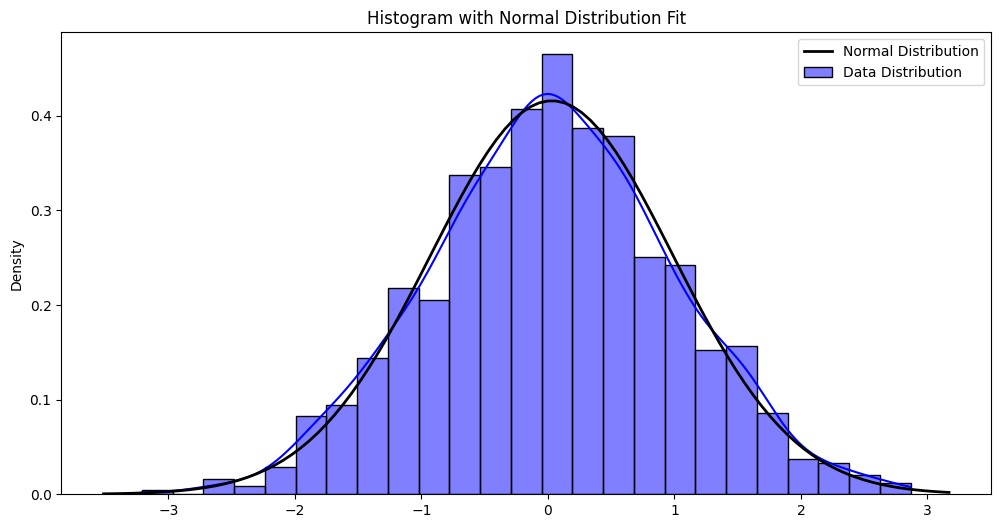

<Figure size 600x600 with 0 Axes>

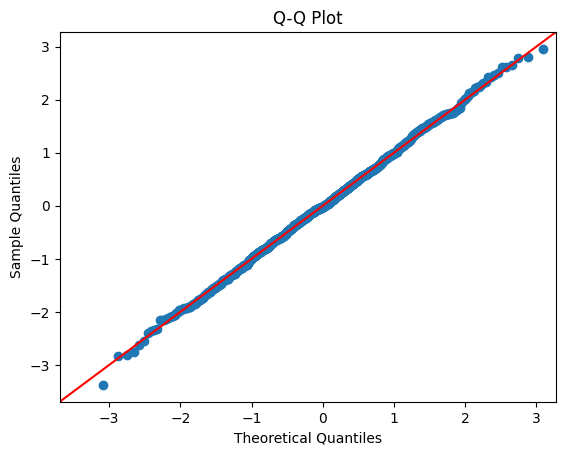

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# 生成一些示例数据（你可以替换为自己的数据）
# 正态分布数据示例
data = np.random.normal(loc=0, scale=1, size=1000)

# 1. Shapiro-Wilk Test
shapiro_stat, shapiro_p_value = stats.shapiro(data)
print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.4f}, p-value={shapiro_p_value:.4f}")

# 2. Kolmogorov-Smirnov Test
ks_stat, ks_p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat:.4f}, p-value={ks_p_value:.4f}")

# 3. Anderson-Darling Test
anderson_result = stats.anderson(data, dist='norm')
print(f"Anderson-Darling Test: Statistic={anderson_result.statistic:.4f}")
for i in range(len(anderson_result.critical_values)):
    sig_level, crit_val = anderson_result.significance_level[i], anderson_result.critical_values[i]
    print(f"  Significance Level {sig_level:.1f}: Critical Value={crit_val:.4f}")

# 4. 绘制直方图和正态分布拟合曲线
plt.figure(figsize=(12, 6))
sns.histplot(data, kde=True, color='blue', stat='density', label='Data Distribution')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(data), np.std(data))
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
plt.title('Histogram with Normal Distribution Fit')
plt.legend()
plt.show()

# 5. 绘制Q-Q图（Quantile-Quantile Plot）
plt.figure(figsize=(6, 6))
sm.qqplot(data, line ='45', fit=True)
plt.title('Q-Q Plot')
plt.show()


Shapiro-Wilk Test:
- 这个测试用于检验数据是否来自正态分布。返回的p值用于判断：
- 如果p值较大（通常大于0.05），则不能拒绝数据服从正态分布的假设。
- 如果p值较小（通常小于0.05），则拒绝数据服从正态分布的假设。


Kolmogorov-Smirnov Test:
- 用于检验数据是否与特定分布（这里是正态分布）相匹配。这个测试对于较大样本量更为敏感。

Anderson-Darling Test:
- 是一个用于检验正态性的统计测试，和Shapiro-Wilk类似，但它在尾部更加敏感。该方法会给出一个统计量和对应的临界值。

绘制直方图和正态分布拟合曲线:
- 直方图展示数据的分布情况，并叠加了一个正态分布曲线以进行直观的比较。

Q-Q图（Quantile-Quantile Plot）:
- 这个图表用于比较数据的分位数与正态分布的分位数。如果数据点在图中大致落在对角线上，则数据接近正态分布。